In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [3]:
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
batch_sizes = [len(x_train), 1, 32]
histories = []

In [5]:
x_small = x_train[:1000]
y_small = y_train[:1000]

for bs in batch_sizes:
    model = build_model()
    history = model.fit(x_small, y_small, epochs=2, batch_size=bs, verbose=0, validation_data=(x_test[:200], y_test[:200]))
    histories.append(history)

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


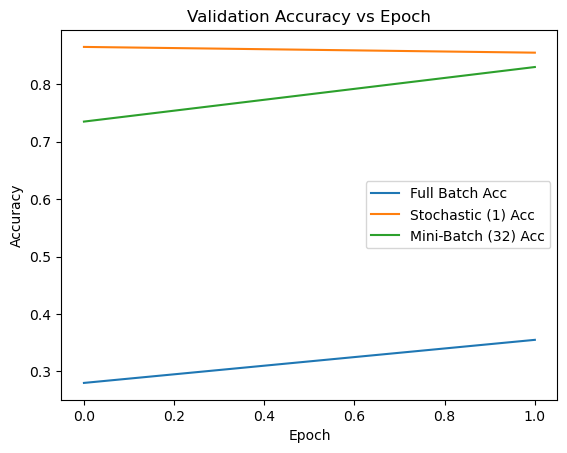

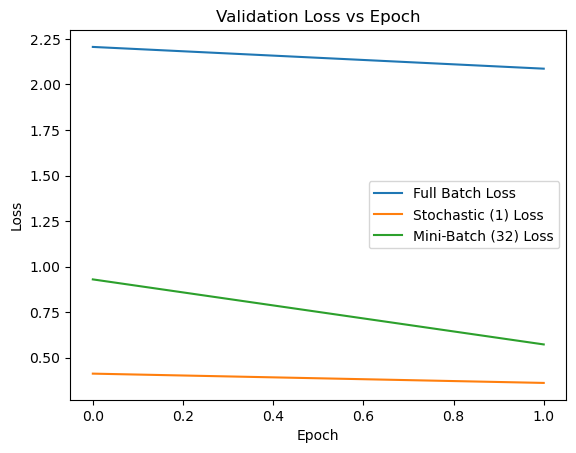

In [7]:
labels = ['Full Batch', 'Stochastic (1)', 'Mini-Batch (32)']
for i, hist in enumerate(histories):
    plt.plot(hist.history['val_accuracy'], label=f'{labels[i]} Acc')
plt.title('Validation Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for i, hist in enumerate(histories):
    plt.plot(hist.history['val_loss'], label=f'{labels[i]} Loss')
plt.title('Validation Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()